In [15]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import tweet_preprocess_mod as pre

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

import itertools
import collections
import pandas
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer, word_tokenize

In [16]:
f = open("/mnt/nvme0n1p4/Users/Taner/PycharmProjects/Research/Data/Mined_Data/tweets_from_2021-08-31_to_2021-09-01.txt", "r")

all_tweets = [pre.preprocess(t) for t in f]

f.seek(0)

new_all_tweets = [" ".join(pre.process_tweet(t)) for t in f]

f.close()

Tablolar:

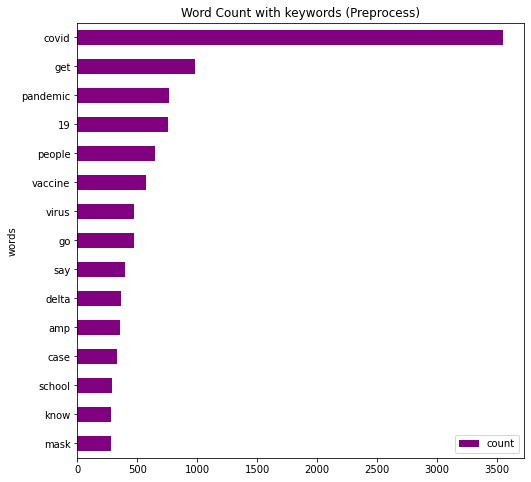

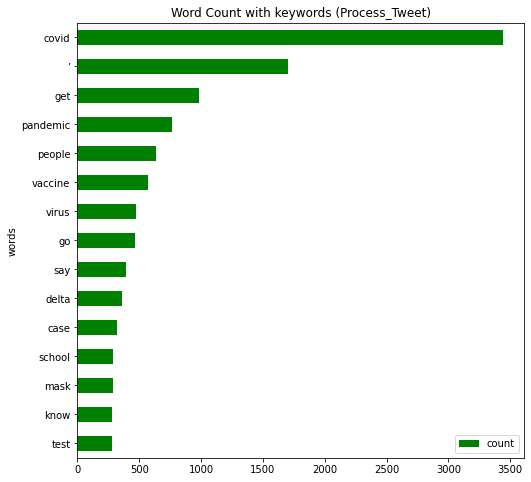

In [19]:
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

all_words = list(itertools.chain(*[tokenizer.tokenize(tweet)
                                  for tweet in all_tweets]))
count = collections.Counter(all_words)
top_words = count.most_common(15)
clean_tweets = pandas.DataFrame(top_words, columns=["words", "count"])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by="count").plot.barh(x="words", y="count", ax=ax, color="purple")
ax.set_title("Word Count with keywords (Preprocess)")
plt.show()


new_all_words = list(itertools.chain(*[tokenizer.tokenize(tweet)
                                  for tweet in new_all_tweets]))
new_count = collections.Counter(new_all_words)
top_words = new_count.most_common(15)
clean_tweets = pandas.DataFrame(top_words, columns=["words", "count"])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by="count").plot.barh(x="words", y="count", ax=ax, color="green")
ax.set_title("Word Count with keywords (Process_Tweet)")
plt.show()

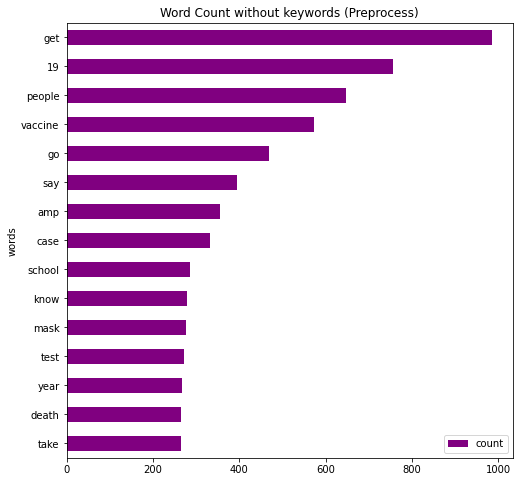

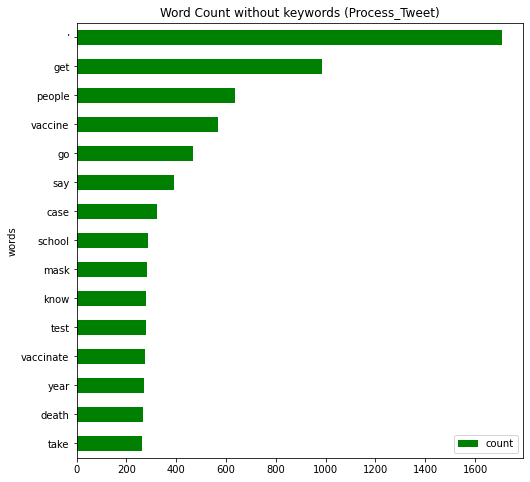

In [20]:
keywords = ["corona", "virus", "covid", "pandemic", "variant", "delta"]

for i in keywords:
    try:
        del count[i]
    except:
        continue
    try:
        del new_count[i]
    except:
        continue

top_words = count.most_common(15)
clean_tweets = pandas.DataFrame(top_words, columns=["words", "count"])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by="count").plot.barh(x="words", y="count", ax=ax, color="purple")
ax.set_title("Word Count without keywords (Preprocess)")
plt.show()


top_words = new_count.most_common(15)
clean_tweets = pandas.DataFrame(top_words, columns=["words", "count"])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by="count").plot.barh(x="words", y="count", ax=ax, color="green")
ax.set_title("Word Count without keywords (Process_Tweet)")
plt.show()


